# 나너먹자 (YOU&I, Sharing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns
import time
import operator

In [ ]:
# 행정동 단위 은행 통계
df = pd.read_csv("import_data/ETB_BDT_KCBD_0008.csv", sep="|")
df

,crtr_ym,ttlz_area_id,age_sgmnt_cd,popu_cnt,ln_holdp_cnt,mm_cvsn_incm_sum_amt,fyr_card_cnsm_sum_amt,mm_avg_card_cnsm_sum_amt,tot_dbt_sum_ramt,mm_avg_dbt_amrt_sum_pncp,mm_avg_dbt_amrt_int_sum_amt,mm_avg_marn_fund_sum_amt,trgtp_rest_vltn_sum_amt
0,201803,11110515,21,23,23,39388000,371126777,34172248,862603270,903563,1817871,2494316,5161010000
1,201803,11110515,22,110,110,288367000,3113292464,258678376,5333326101,77996955,12881202,-62601885,28507660000
2,201803,11110515,31,256,256,833152000,7187774843,588065675,17460462905,151816103,38667596,54602624,66260000000
3,201803,11110515,32,410,410,1594513000,13147734123,1096927775,34770790797,264778555,83383629,149423039,122676890000
4,201803,11110515,41,434,434,1779918000,15051033128,1294868745,37676301916,222090244,91387476,171571533,145021850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
686051,202203,50130620,51,53,53,216307000,1679792996,134489551,4475199555,242968417,11505475,-172656444,20239430000
686052,202203,50130620,52,51,51,210086000,1795103345,147330608,3538015835,61391699,9219637,-7855944,25048980000
686053,202203,50130620,61,40,40,141910000,1267034141,111722995,3549443169,8195664,9256702,10401638,20534150000
686054,202203,50130620,62,39,39,130763000,1342139186,97879517,6579584718,18876963,16515252,-2508733,16726030000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686056 entries, 0 to 686055
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   crtr_ym                      686056 non-null  int64
 1   ttlz_area_id                 686056 non-null  int64
 2   age_sgmnt_cd                 686056 non-null  int64
 3   popu_cnt                     686056 non-null  int64
 4   ln_holdp_cnt                 686056 non-null  int64
 5   mm_cvsn_incm_sum_amt         686056 non-null  int64
 6   fyr_card_cnsm_sum_amt        686056 non-null  int64
 7   mm_avg_card_cnsm_sum_amt     686056 non-null  int64
 8   tot_dbt_sum_ramt             686056 non-null  int64
 9   mm_avg_dbt_amrt_sum_pncp     686056 non-null  int64
 10  mm_avg_dbt_amrt_int_sum_amt  686056 non-null  int64
 11  mm_avg_marn_fund_sum_amt     686056 non-null  int64
 12  trgtp_rest_vltn_sum_amt      686056 non-null  int64
dtypes: int64(13)
memory usage: 68

In [ ]:
df = df[['ttlz_area_id', 'age_sgmnt_cd', 'popu_cnt', 'mm_avg_card_cnsm_sum_amt']]
df

,ttlz_area_id,age_sgmnt_cd,popu_cnt,mm_avg_card_cnsm_sum_amt
0,11110515,21,23,34172248
1,11110515,22,110,258678376
2,11110515,31,256,588065675
3,11110515,32,410,1096927775
4,11110515,41,434,1294868745
...,...,...,...,...
686051,50130620,51,53,134489551
686052,50130620,52,51,147330608
686053,50130620,61,40,111722995
686054,50130620,62,39,97879517


In [ ]:
# 행정코드를 이용해 전주시 추출 
df1 = df.loc[(df.ttlz_area_id >= 45111510) & (df.ttlz_area_id <= 45113670)]
df1

,ttlz_area_id,age_sgmnt_cd,popu_cnt,mm_avg_card_cnsm_sum_amt
26428,45111510,21,16,21409977
26429,45111510,22,76,160480800
26430,45111510,31,97,264276649
26431,45111510,32,135,504723091
26432,45111510,41,132,391749024
...,...,...,...,...
672581,45113670,51,800,2572369836
672582,45113670,52,494,1522714262
672583,45113670,61,246,565426643
672584,45113670,62,101,209748663


In [ ]:
# 연령코드 범주형으로 변경
df1.loc[(df1.age_sgmnt_cd>=20) & (df1.age_sgmnt_cd <= 25), 'age'] = 20
df1.loc[(df1.age_sgmnt_cd>=30) & (df1.age_sgmnt_cd <= 39), 'age'] = 30
df1.loc[(df1.age_sgmnt_cd>=40) & (df1.age_sgmnt_cd <= 49), 'age'] = 40
df1.loc[(df1.age_sgmnt_cd>=50) & (df1.age_sgmnt_cd <= 59), 'age'] = 50
df1.loc[(df1.age_sgmnt_cd>=60), 'age'] = 60

/analysis/packages/python/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/analysis/packages/python/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df1

,ttlz_area_id,age_sgmnt_cd,popu_cnt,mm_avg_card_cnsm_sum_amt,age
26428,45111510,21,16,21409977,20.000
26429,45111510,22,76,160480800,20.000
26430,45111510,31,97,264276649,30.000
26431,45111510,32,135,504723091,30.000
26432,45111510,41,132,391749024,40.000
...,...,...,...,...,...
672581,45113670,51,800,2572369836,50.000
672582,45113670,52,494,1522714262,50.000
672583,45113670,61,246,565426643,60.000
672584,45113670,62,101,209748663,60.000


In [ ]:
# 월별 평균 카드 소비량
df1['avg_card_use'] = df1['mm_avg_card_cnsm_sum_amt'] / df1['popu_cnt']
df1

/tmp/ipykernel_600/2964146389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_card_use'] = df1['mm_avg_card_cnsm_sum_amt'] / df1['popu_cnt']


,ttlz_area_id,age_sgmnt_cd,popu_cnt,mm_avg_card_cnsm_sum_amt,age,avg_card_use
26428,45111510,21,16,21409977,20.000,1338123.562
26429,45111510,22,76,160480800,20.000,2111589.474
26430,45111510,31,97,264276649,30.000,2724501.536
26431,45111510,32,135,504723091,30.000,3738689.563
26432,45111510,41,132,391749024,40.000,2967795.636
...,...,...,...,...,...,...
672581,45113670,51,800,2572369836,50.000,3215462.295
672582,45113670,52,494,1522714262,50.000,3082417.534
672583,45113670,61,246,565426643,60.000,2298482.289
672584,45113670,62,101,209748663,60.000,2076719.436


In [ ]:
# 식료품 소비 비율 (출처: 통계청)
cost_df = pd.DataFrame({'나이' : [20, 30, 40, 50, 60], '평균 소비지출에 대한 비율' : [0.322289, 0.327948, 0.300934, 0.294012, 0.341274], 
                        '중앙값 소비지출에 대한 비율' : [0.346840, 0.353333, 0.323304, 0.329309, 0.414465]})
cost_df

,나이,평균 소비지출에 대한 비율,중앙값 소비지출에 대한 비율
0,20,0.322,0.347
1,30,0.328,0.353
2,40,0.301,0.323
3,50,0.294,0.329
4,60,0.341,0.414


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# 연령대별 평균 카드 소비량
g = df1[['age', 'avg_card_use']].groupby('age').mean()
g

,avg_card_use
age,
20.000,1780040.263
30.000,2725933.342
40.000,3006254.395
50.000,2633320.692
60.000,1601725.516


In [ ]:
# 연령대별 예상 식료품 소비량
temp = cost_df[['평균 소비지출에 대한 비율']].to_numpy()
temp2 = g[['avg_card_use']].to_numpy()
result = pd.DataFrame(temp * temp2)
print(result)

           0
0 573687.396
1 893964.388
2 904684.160
3 774227.883
4 546627.274


<AxesSubplot:xlabel='age', ylabel='avg_card_use'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


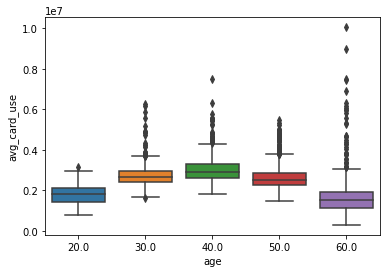

In [ ]:
# box-plot으로 연령대별 평균 카드 소비량 분포 확인
sns.boxplot(y='avg_card_use', x='age', data=df1)

/analysis/packages/python/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/analysis/packages/python/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/analysis/packages/python/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

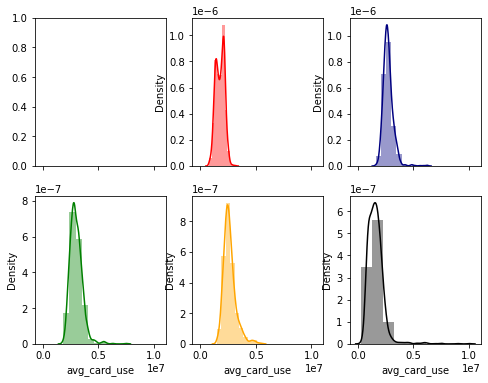

In [ ]:
# histogram으로 연령대별 평균 카드 소비량 분포 확인
bins=10
f, axes = plt.subplots(2,3,figsize=(8,6), sharex=True)
sns.distplot(df1[df1.age == 20]["avg_card_use"], color="red", ax=axes[0,1], label="20", hist=True, kde=True, bins=bins)
sns.distplot(df1[df1.age == 30]["avg_card_use"], color="navy", ax=axes[0,2], label="30", hist=True, kde=True, bins=bins)
sns.distplot(df1[df1.age == 40]["avg_card_use"], color="green", ax=axes[1,0], label="40", hist=True, kde=True, bins=bins)
sns.distplot(df1[df1.age == 50]["avg_card_use"], color="orange", ax=axes[1,1], label="50", hist=True, kde=True, bins=bins)
sns.distplot(df1[df1.age == 60]["avg_card_use"], color="black", ax=axes[1,2], label="60", hist=True, kde=True, bins=bins)
plt.show()

## 행정동별 해당 연령대 범주에 속하는 예상 과채류(식료품) 소비비용

In [ ]:
df2 = df1
df2

,ttlz_area_id,age_sgmnt_cd,popu_cnt,mm_avg_card_cnsm_sum_amt,age,avg_card_use
26428,45111510,21,16,21409977,20.000,1338123.562
26429,45111510,22,76,160480800,20.000,2111589.474
26430,45111510,31,97,264276649,30.000,2724501.536
26431,45111510,32,135,504723091,30.000,3738689.563
26432,45111510,41,132,391749024,40.000,2967795.636
...,...,...,...,...,...,...
672581,45113670,51,800,2572369836,50.000,3215462.295
672582,45113670,52,494,1522714262,50.000,3082417.534
672583,45113670,61,246,565426643,60.000,2298482.289
672584,45113670,62,101,209748663,60.000,2076719.436


In [ ]:
# 행정 코드를 이용해 전주시 추출
a = df2.loc[df2.ttlz_area_id == 45111510, :]
a

,ttlz_area_id,age_sgmnt_cd,popu_cnt,mm_avg_card_cnsm_sum_amt,age,avg_card_use,area_avg_card
26428,45111510,21,16,21409977,20.000,1338123.562,0
26429,45111510,22,76,160480800,20.000,2111589.474,0
26430,45111510,31,97,264276649,30.000,2724501.536,0
26431,45111510,32,135,504723091,30.000,3738689.563,0
26432,45111510,41,132,391749024,40.000,2967795.636,0
...,...,...,...,...,...,...,...
672176,45111510,51,143,558728222,50.000,3907190.364,0
672177,45111510,52,167,807163522,50.000,4833314.503,0
672178,45111510,61,156,425466129,60.000,2727346.981,0
672179,45111510,62,91,182813188,60.000,2008936.132,0


In [ ]:
temp = [0.322289, 0.327948, 0.300934, 0.294012, 0.341274]
temp2 = [20, 30, 40, 50, 60]
for i, j in zip(temp, temp2):
    x = a.loc[a.age == j, :]
    result = x['mm_avg_card_cnsm_sum_amt'].sum() / x['popu_cnt'].sum() * i
    print(result)

692319.1594576078
1068468.086112898
1191166.7090615998
1205677.394582179
804554.8033253511


In [ ]:
# 행정동별 연령대별 예상 식료품 소비량
temp = [0.322289, 0.327948, 0.300934, 0.294012, 0.341274]
temp2 = [20, 30, 40, 50, 60]
temp3 = [45111510, 45111530, 45111605, 45111635, 45111650, 45111660, 45111671, 45111672, 45111680, 45111691, 45111692, 45111701, 45111702, 45111703, 45111711, 45111712, 45111713, 45111714, 45111730, 
         45113525, 45113540, 45113550, 45113560, 45113570, 45113580, 45113590, 45113600, 45113611, 45113612, 45113620, 45113641, 45113642, 45113650, 45113660, 45113665, 45113670]

for k in temp3:
    a = df2.loc[df2.ttlz_area_id == k, :]
    print('-----')
    for i, j in zip(temp, temp2):
        x = a.loc[a.age == j, :]
        result = x['mm_avg_card_cnsm_sum_amt'].sum() / x['popu_cnt'].sum() * i
        print(result)

-----
692319.1594576078
1068468.086112898
1191166.7090615998
1205677.394582179
804554.8033253511
-----
647986.2636838178
855317.1754932851
888094.009486116
747728.9591495944
480555.12284030224
-----
663288.9101272788
868664.1971408634
869490.8158592823
827638.7242966805
503709.0106261379
-----
603708.573331585
918572.570924503
800531.1876664893
699288.2169294838
425899.8184908932
-----
571663.3804247481
1019225.7906307101
752994.4165518994
661310.6286971476
510649.9551965491
-----
560979.368393
721523.169694494
711430.9175798185
629202.4833400416
445958.37777612143
-----
621813.7808075718
856010.8848567752
894415.0083811656
805255.8886095954
716050.6992916669
-----
624536.1414679656
896220.3381159643
1075019.9305026364
1054112.308199255
696985.5124539217
-----
652297.5302877822
925118.0511505385
991908.4216208777
841936.1379993716
599296.3481450437
-----
593743.6137440953
810966.4185938771
825763.4686625425
648336.7290954965
511091.4538652457
-----
654985.8470039864
904591.7831693693
9

/tmp/ipykernel_600/2814428624.py:11: RuntimeWarning: invalid value encountered in long_scalars
  result = x['mm_avg_card_cnsm_sum_amt'].sum() / x['popu_cnt'].sum() * i
